Given a string s, find the length of the longest 
substring
 without repeating characters.

 

Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.
Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.
 

Constraints:

0 <= s.length <= 5 * 104
s consists of English letters, digits, symbols and spaces.

In [7]:
x = set("aa")
len(x)


1

s
cur_subst = ''
for c in s: # go through each char of s
    if len(cur_subst) !=len(set(cur_subst)):
    

In [68]:
s = "abcdd"
s.index('d'), s[s.index('a')+1:]

(3, 'bcdd')

In [75]:
# s='pwwkew' #kew or wke
# s='aab' # ab
# s='dvdf' # vdf
s='dbvdf' # vdf
s='bdvdf' # vdf
# s = 'qfedbaaklm' #aklm
s = "ckilbkd" #ckilb
cur_subst = ''
res = ''
i = 0
prev = ''
for c in s: # go through each char of s
    if c in cur_subst:
        if prev ==c:
            cur_subst=''
        else:
            cur_subst=cur_subst[cur_subst.index(c)+1:]
    cur_subst +=c
    if len(cur_subst)>len(res):
        res = cur_subst
    prev = c
res

'ckilb'

In [61]:
c = 'k'
cur_subst = 'ckilb'
if c in cur_subst:
    if cur_subst[-1]!=c:
        print(cur_subst)
        cur_subst.replace(c,'',-1)
    else:
        cur_subst=''
cur_subst +=c

# cur_subst, cur_subst[-1]!=c

ckilb


My solution:
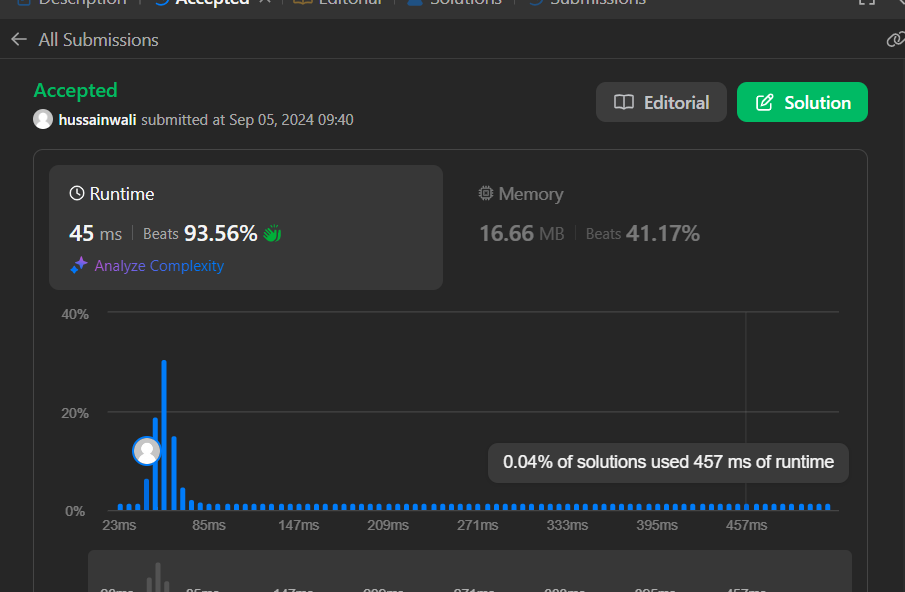

In [76]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        cur_subst = ''
        res = ''
        prev = ''
        for c in s: # go through each char of s
            if c in cur_subst:
                if prev ==c:
                    cur_subst=''
                else:
                    cur_subst=cur_subst[cur_subst.index(c)+1:]
            cur_subst +=c

            if len(cur_subst)>len(res):
                res = cur_subst
            prev = c

        return len(res)

##  sliding window solution:

indext    0    1    2    3   4   5   6   7
string    a    c    b    d   b   a   c   d
          ^                  ^
          |                  |
		left               right
		seen = {a : 0, c : 1, b : 2, d: 3} 
		# case 1: seen[b] = 2, current window  is s[0:4] , 
		#        b is inside current window, seen[b] = 2 > left = 0. Move left pointer to seen[b] + 1 = 3
		seen = {a : 0, c : 1, b : 4, d: 3} 
indext    0    1    2    3   4   5   6   7
string    a    c    b    d   b   a   c   d
						 ^   ^
					     |   |
				      left  right		
indext    0    1    2    3   4   5   6   7
string    a    c    b    d   b   a   c   d
					     ^       ^
					     |       |
				       left    right		
		# case 2: seen[a] = 0,which means a not in current window s[3:5] , since seen[a] = 0 < left = 3 
		# we can keep moving right pointer.

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        seen = {}
        l = 0
        output = 0
        for r in range(len(s)):
            c = s[r]
            """
            If c not in seen, we can keep increasing the window size by moving right pointer
            """
            if c not in seen:
                output = max(output,r-l+1)
                """
                There are two cases if c in seen:
                case1: c is inside the current window, we need to change the window by moving left pointer to seen[c] + 1.
                case2: c is not inside the current window, we can keep increase the window
                """
            else:
                if seen[c] < l:
                    output = max(output,r-l+1)
                else:
                    l = seen[c] + 1
            seen[c] = r
        return output
s='dvdf' # vdf
    

#### Gregs

In [ ]:
s = 'dvdf'
s = 'aab'
s = 'abcabc'
sett = set()
l = 0
longest = 0

res = 0

# O(n)
for r in range(len(s)):
    while s[r] in sett:
        sett.remove(s[l])
        l+=1
    w = r-l+1
    longest = max(longest, w)
    sett.add(s[r])
longest